In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize' ] =  (14,12)
%matplotlib inline


In [3]:
df = pd.read_csv('http://user.math.uzh.ch/furrer/download/sta121/europejobs.csv')

In [89]:
class pca:
    
    def __init__(self,n_components,standarize = True):
        self.n_components = n_components
        self.standarize = standarize
        
    def fit(self,data):
        
        data.columns = [x.strip().lower() for x in data.columns]
        self.columns_ = data.columns
        #Standarize the data
        if self.standarize:
            X = (data  - np.mean(data))/ np.std(data)
            self.X = X
        #Find the eigenvalues and eigenvectors
        S = X.T @ X
        eig_val ,eig_vec = np.linalg.eig(S)
        
        self.eig_vec_n = eig_vec.T[0:self.n_components]
        self.eig_val_n = eig_val[0:self.n_components]
        
    def transform(self,data):
        
        X_new = self.X @ self.eig_vec_n.T
        X_new.columns = ['pc' + str(i+1) for i in range(self.n_components)]
        self.X_new = X_new
        
        return X_new
    
    def biplot(self,annotate_points = True , annotate_var = True):
        
        sns.set_style('whitegrid')

        f, ax = plt.subplots(figsize = (14,12))

        for i,j,z in zip(self.eig_vec_n[0],self.eig_vec_n[1], self.columns_):
            ax.arrow(0,0,i * max(self.X_new.pc1) ,j * max(self.X_new.pc2) , color = '#566573',head_width = 0.05)
            if annotate_var:
                ax.annotate(text = z,xy = (i * max(self.X_new.pc1),j * max(self.X_new.pc2)) ,color = '#2980B9' , fontsize = 20)


        sns.scatterplot(x = self.X_new.pc1.values , y = self.X_new.pc2.values ,ax = ax)
        if annotate_points:
            for c in range(len(self.X_new)):
                ax.text(self.X_new.pc1[c] , self.X_new.pc2[c] , s = self.X_new.index[c] ,fontsize = 15 , ha = 'left',linespacing = 5)  
        
        plt.xlabel('PC1' ,fontsize = 14)
        plt.ylabel('PC2',fontsize = 14)
        plt.title('Biplot PCA',fontsize = 16)
        


In [90]:
pca_ = pca(2)

In [91]:
pca_.fit(df)

In [92]:
X_new = pca_.transform(df)

In [93]:
X_new

,pc1,pc2
Belgium,-1.710498,-1.221791
Denmark,-0.952902,-2.127785
France,-0.754630,-1.121208
W.Germany,-0.852553,-0.011377
Ireland,0.103502,-0.413987
Italy,-0.375407,-0.769547
Luxembourg,-1.059442,0.755827
Netherlands,-1.688217,-2.004845
UnitedKingdom,-1.630449,-0.373130
Austria,-1.176448,0.143101


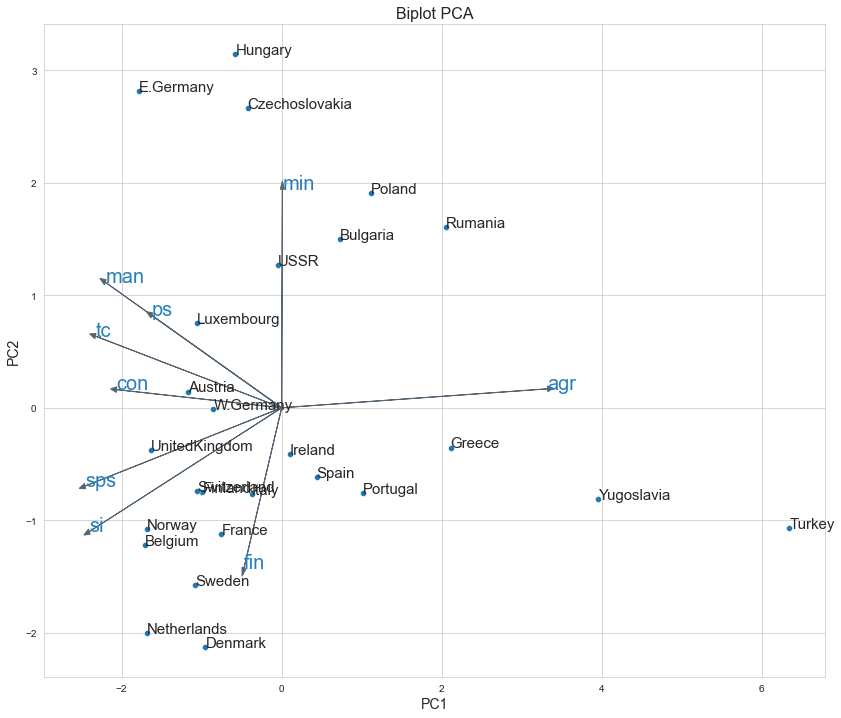

In [95]:
pca_.biplot()